In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

# Reading the Data

In [2]:
df= pd.read_csv('Data_Mobil_Indonesia.csv', na_values='-')

In [3]:
df=df.drop(['JT_Kota','JT_JalanRaya','Unnamed: 26'], axis=1)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pelanggan    205 non-null    int64  
 1   Level_Risiko    205 non-null    int64  
 2   Merek_Mobil     205 non-null    object 
 3   BBM             205 non-null    object 
 4   Tipe_Mobil      205 non-null    object 
 5   Pintu_Mobil     205 non-null    object 
 6   Badan_Mobil     205 non-null    object 
 7   Roda_Penggerak  205 non-null    object 
 8   Lokasi_Mesin    205 non-null    object 
 9   Sumbu_Roda      205 non-null    float64
 10  Panjang         205 non-null    float64
 11  Lebar           205 non-null    float64
 12  Tinggi          205 non-null    float64
 13  Berat           205 non-null    int64  
 14  Mesin           205 non-null    object 
 15  Silinder        205 non-null    object 
 16  Ukuran_Mesin    205 non-null    int64  
 17  Sistem_BBM      205 non-null    obj

## Creating Dummy Variables

In [5]:
df['Silinder'].value_counts()

four      159
six        24
five       11
eight       5
two         4
three       1
twelve      1
Name: Silinder, dtype: int64

In [6]:
df['Silinder'] = df['Silinder'].replace(['four', 'six', 'five','eight','two','three','twelve'], ['4', '6','5','8','2','3','12'])

In [7]:
df['Silinder'] = df['Silinder'].astype(float)

In [8]:
df['Roda_Penggerak'].value_counts()

fwd    120
rwd     76
4wd      9
Name: Roda_Penggerak, dtype: int64

In [9]:
df['Roda_Penggerak_num'] = df['Roda_Penggerak'].replace(['fwd', 'rwd', '4wd'], ['1','2','3'])

In [10]:
df['Roda_Penggerak_num'] = df['Roda_Penggerak_num'].astype(float)

Elements in roda penggerak is changed as follows:

FWD: 1

RWD: 2

4WD: 3

## Dropping unnecessary columns

In [11]:
df=df.drop(['ID_Pelanggan','Merek_Mobil','BBM','Tipe_Mobil','Pintu_Mobil','Badan_Mobil','Lokasi_Mesin','Roda_Penggerak', 'RPM','Panjang','Kompresi','Tinggi','Sistem_BBM','Mesin','Level_Risiko','Stroke'], axis=1)

In [12]:
df = df[['Sumbu_Roda','Lebar','Berat','Silinder','Ukuran_Mesin','Rasio_Bore','Daya_Kuda','Roda_Penggerak_num','Harga_Mobil']]

In [13]:
df

,Sumbu_Roda,Lebar,Berat,Silinder,Ukuran_Mesin,Rasio_Bore,Daya_Kuda,Roda_Penggerak_num,Harga_Mobil
0,88.6,64.1,2548,4.0,130,3.47,111,2.0,13495.0
1,88.6,64.1,2548,4.0,130,3.47,111,2.0,16500.0
2,94.5,65.5,2823,6.0,152,2.68,154,2.0,16500.0
3,99.8,66.2,2337,4.0,109,3.19,102,1.0,13950.0
4,99.4,66.4,2824,5.0,136,3.19,115,3.0,17450.0
...,...,...,...,...,...,...,...,...,...
200,109.1,68.9,2952,4.0,141,3.78,114,2.0,16845.0
201,109.1,68.8,3049,4.0,141,3.78,160,2.0,19045.0
202,109.1,68.9,3012,6.0,173,3.58,134,2.0,21485.0
203,109.1,68.9,3217,6.0,145,3.01,106,2.0,22470.0


# Exploratory data analysis (EDA)

In [14]:
df.describe()

,Sumbu_Roda,Lebar,Berat,Silinder,Ukuran_Mesin,Rasio_Bore,Daya_Kuda,Roda_Penggerak_num,Harga_Mobil
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,65.907805,2555.565854,4.380488,126.907317,3.329756,104.117073,1.458537,13276.710571
std,6.021776,2.145204,520.680204,1.080854,41.642693,0.270844,39.544167,0.581148,7988.852332
min,86.600000,60.300000,1488.000000,2.000000,61.000000,2.540000,48.000000,1.000000,5118.000000
25%,94.500000,64.100000,2145.000000,4.000000,97.000000,3.150000,70.000000,1.000000,7788.000000
50%,97.000000,65.500000,2414.000000,4.000000,120.000000,3.310000,95.000000,1.000000,10295.000000
75%,102.400000,66.900000,2935.000000,4.000000,141.000000,3.580000,116.000000,2.000000,16503.000000
max,120.900000,72.300000,4066.000000,12.000000,326.000000,3.940000,288.000000,3.000000,45400.000000


The average cost of a car is 13,276 with a standard deviation of 7,988. The cheapest car listed in the data is 5,118 and the most expensive is 45,400. The average weight of the car is 2,555 with a standard deviation of 520. Based on the quartile range, most cars in the dataset have 4 cylinders. The average horse power is 104 with a standard deviation of 39. 

### Histogram 

C:\Users\willi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


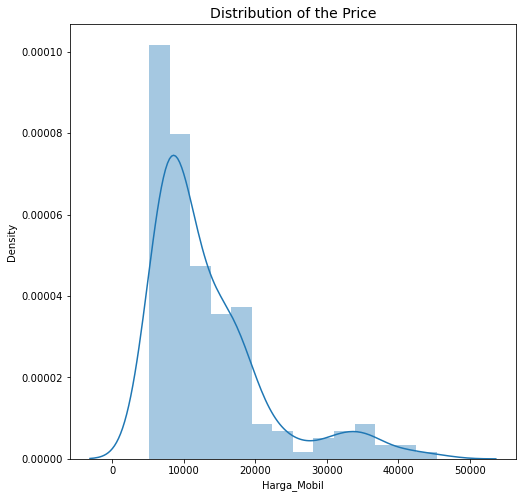

In [15]:
plt.subplots(figsize=(8, 8))
plt.title('Distribution of the Price', fontsize=14)
sns.distplot(df['Harga_Mobil'])
plt.show()

From the distribution of the car prices, we know that most cars are priced at around 10,000.

C:\Users\willi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


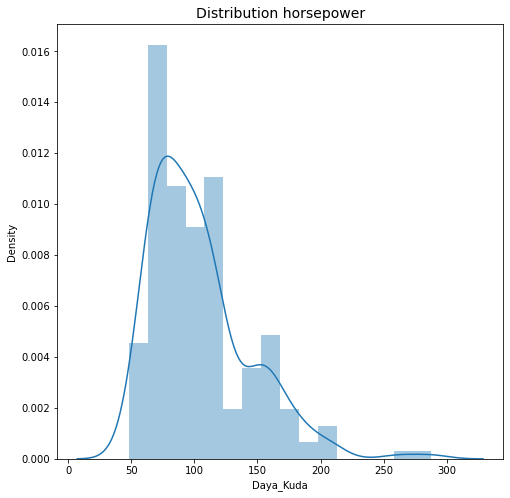

In [16]:
plt.subplots(figsize=(8, 8))
plt.title('Distribution horsepower', fontsize=14)
sns.distplot(df['Daya_Kuda'])
plt.show()

From the chart, we can see that most of the cars have a horsepower between 50 and 100 horsepower. 

C:\Users\willi\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


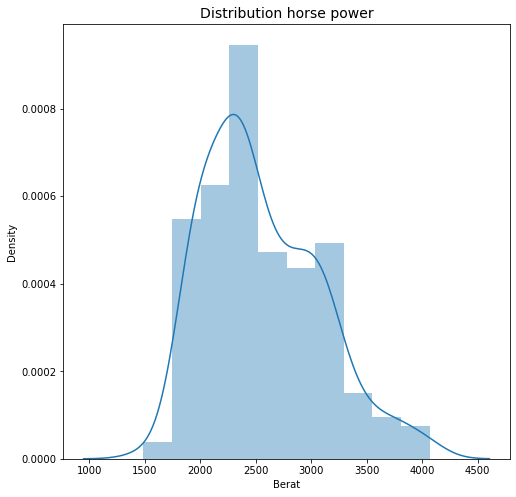

In [17]:
plt.subplots(figsize=(8, 8))
plt.title('Distribution horse power', fontsize=14)
sns.distplot(df['Berat'])
plt.show()

From the density graph, we can conclude that most of the cars weight between 2000 and 3000.

### Boxplot 

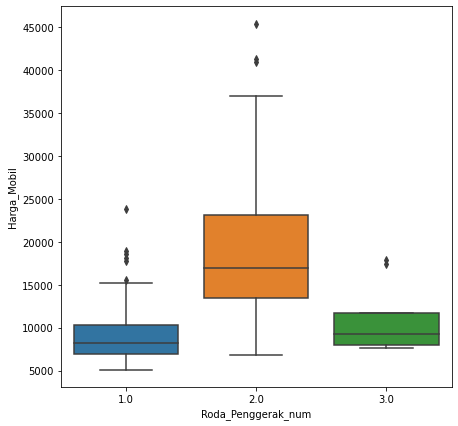

In [18]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df, x='Roda_Penggerak_num', y='Harga_Mobil')
plt.show()

We can see that RWD have the highest maximum point while the 4WD have the lowest maximum point. The FWD category has the lowest minimum point followed by RWD and then 4WD. The IQR for FWD and 4WD is relatively similar while the IQR of RWD has a much wider spread. The price IQR for RWD is also much higher than both FWD and 4WD, it is placed between 13,000 and 23,000.

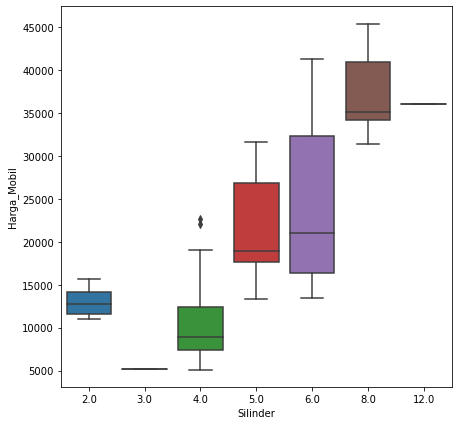

In [19]:
fig, ax = plt.subplots(figsize=(7,7))
sns.boxplot(data=df, x='Silinder', y='Harga_Mobil')
plt.show()

From the graph, we can easily see that cars with 8 cylinders have the highest maximum point followed by 6 cylinders, 12 cylinders, 5 cylinders, 4 cylinders, 2 cylinders, and 3 cylinders. We can also see that cars with 6 cylinders have the biggest IQR spread. Based on the boxplot, we can see that the more cylinders a car have, the more expensive the car tends to be.

# Variable Correlation

We have a dataset of cars. We want to see if there is any correlation between the price of the cars and other variables. 

To do this, we will take 1 dependent variable which is 'Harga_Mobil' and 8 independent variable namely:
    1. Silinder
    2. Ukuran_Mesin
    3. Daya_Kuda
    4. Lebar
    5. Roda_Penggerak
    6. Rasio_Bore
    7. Berat
    8. Sumbu Roda
    
We can see that the variable 'Silinder' and 'Roda Penggerak' is not numerical, so we will change it. We will use dummy variables for the elements of 'Roda Penggerak' FWD as 1, RWD as 2 and 4WD as 3. 

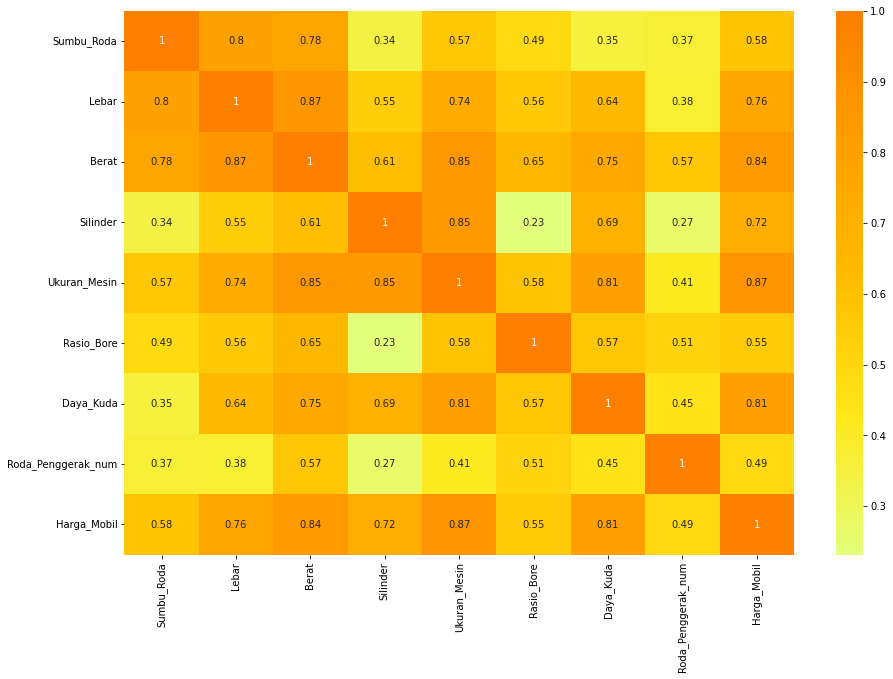

In [20]:
corr = df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(corr, cmap = 'Wistia', annot= True);

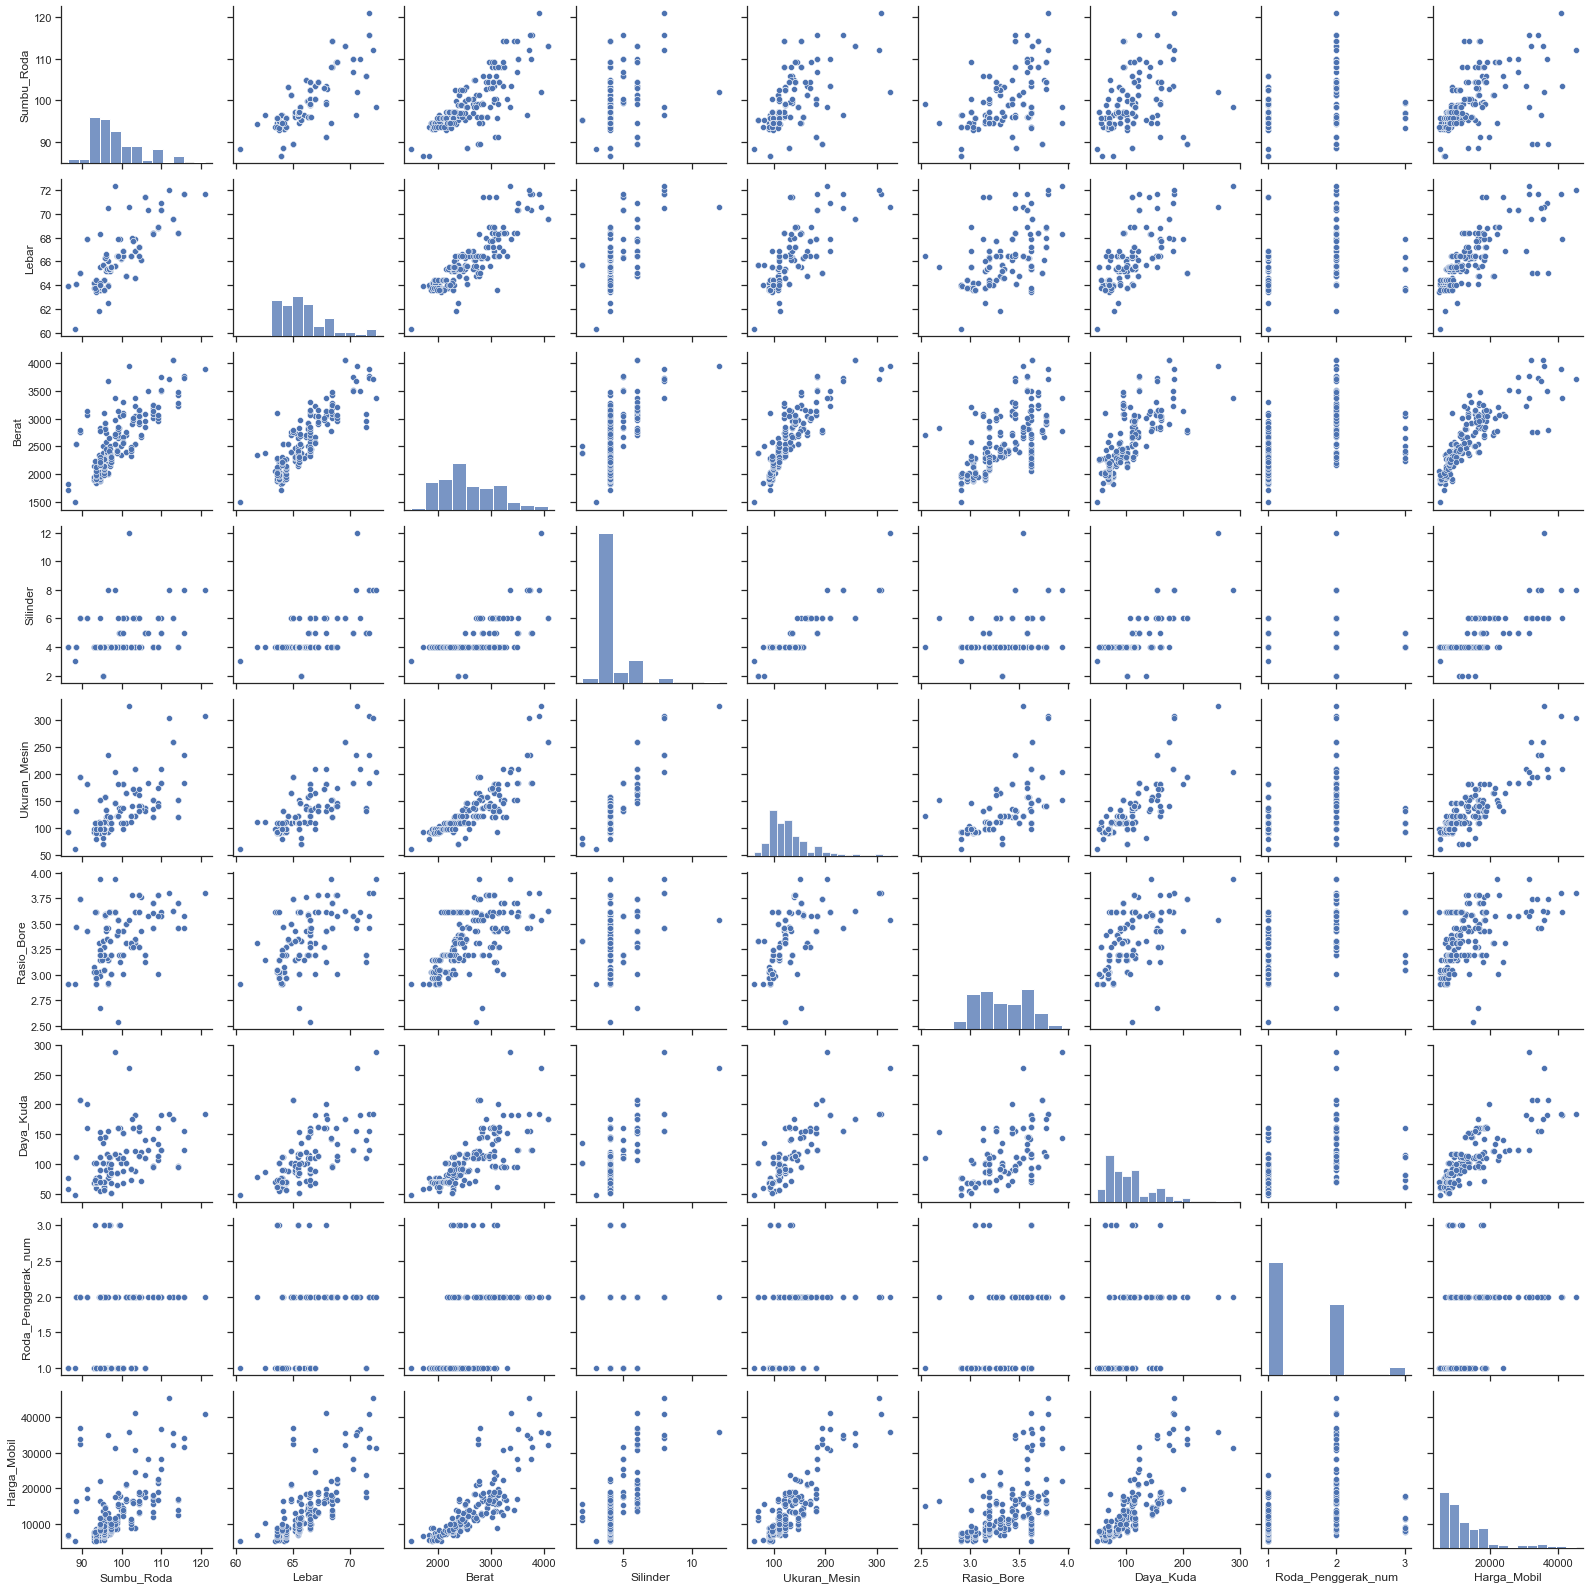

In [21]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(df)

We can see that 'Harga_Mobil' Have a relatively good correlation with all the other variables. However, some independent variable have high correlation with each other which may cause the model to be less accurate.

# Building Model

## Training 

In [22]:
X = df.drop(["Harga_Mobil"],axis=1)
y = df["Harga_Mobil"]

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [24]:
# Fitting a linear model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
# Training our model
model.fit(X_train,y_train)

# Printing intercept
print("Intercept:",model.intercept_)

# Printing coefficients for the given features using a pandas dataframe
model_coefs = pd.DataFrame({'Feature/Column': list(X.columns), 'Coefficient': model.coef_})
print(model_coefs)

Intercept: -55353.61749458769
       Feature/Column  Coefficient
0          Sumbu_Roda    -7.891810
1               Lebar   903.623381
2               Berat    -0.659605
3            Silinder  -561.799096
4        Ukuran_Mesin   102.210665
5          Rasio_Bore -2618.636425
6           Daya_Kuda    60.943506
7  Roda_Penggerak_num  2329.045863


From these results, we can conclude that 'Sumbu_Roda', 'Berat', 'Silinder', and 'Rasio_Bore' have  a negative correlation with the price of the car while the other variables have a positive correlation.

## Predictions

In [25]:
y_pred = model.predict(X_test)

## Model evaluation 

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Calculating metrics
print("The R-squared score is {:.4f}".format(r2_score(y_test,y_pred)))
print("The Root Mean Squared error is {:.4f}".format(np.sqrt(mean_squared_error(y_test,y_pred))))
print("The Mean Absolute error is {:.4f}".format(np.sqrt(mean_absolute_error(y_test,y_pred))))

The R-squared score is 0.8168
The Root Mean Squared error is 3478.1563
The Mean Absolute error is 50.4853


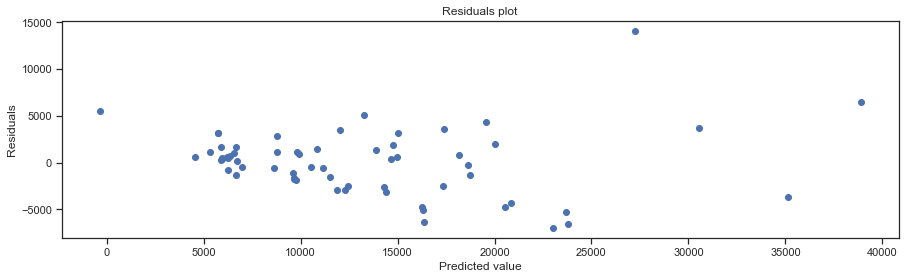

In [27]:
# Residuals plot(overall)
plt.figure(figsize=(15,4))
plt.scatter(y_pred,y_test-y_pred)
plt.title("Residuals plot")
plt.xlabel("Predicted value")
plt.ylabel("Residuals")
plt.show()

From the result we can see that the R-squared score is 0.81 indicating that the model is relatively good and is able to predict up to 80% of the input.